In [1]:
import pandas as pd
#import seaborn as sns
import numpy as np
import shap


C:\Users\Sony\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Sony\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Sony\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('v6_data(1).csv', index_col=0)

In [3]:
df.head()

,baths,fireplace,sqft,beds,stories,target,pool,raiting_school,distance_school,year_built,...,pop_5kk+,pop_1kk+,heating_count,cooling_count,parking_count,Rank_2021,Rank_2010,population2021,population2010,changes
1,2.0,1.0,3000.0,3.0,1.0,2895000.0,1.0,6.666667,1.960000,1961.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,39237836,37253956,5.30
2,8.0,1.0,6457.0,5.0,3.0,2395000.0,0.0,9.250000,0.752500,2006.0,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,29527941,25145561,17.40
3,3.0,0.0,2839.0,4.0,1.0,525000.0,1.0,7.333333,2.040000,1996.0,...,0.0,1.0,1.0,1.0,2.0,3.0,4.0,21781128,18801310,15.85
4,4.0,1.0,3080.0,4.0,2.0,365000.0,0.0,7.000000,1.935000,2016.0,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,29527941,25145561,17.40
6,4.0,1.0,3645.0,4.0,2.0,499007.0,0.0,8.333333,3.213333,2019.0,...,0.0,0.0,1.0,1.0,1.0,2.0,2.0,29527941,25145561,17.40


In [4]:
#df.drop(columns=["status",'propertyType','street','homeFacts','city','zipcode','state','heating','cooling','parking'],inplace=True)

In [4]:
df.head(2).T

,1,2
baths,2.000000e+00,8.000000e+00
fireplace,1.000000e+00,1.000000e+00
sqft,3.000000e+03,6.457000e+03
beds,3.000000e+00,5.000000e+00
stories,1.000000e+00,3.000000e+00
target,2.895000e+06,2.395000e+06
pool,1.000000e+00,0.000000e+00
raiting_school,6.666667e+00,9.250000e+00
distance_school,1.960000e+00,7.525000e-01
year_built,1.961000e+03,2.006000e+03


In [37]:
categorical_features = ['fireplace','stories','pool','heating_bool','parking_bool','cooling_bool',
                        'is_expensive','pop_1m+','pop_5kk+','pop_1kk+','Rank_2021','Rank_2010']

continious_features = ['baths', 'sqft', 'beds','raiting_school', 'distance_school','year_built','remodeled_year','lotsize'
                       , 'heating_count','cooling_count','parking_count','population2010','population2021','changes']
features = categorical_features+ continious_features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73233 entries, 1 to 109596
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   baths            73233 non-null  float64
 1   fireplace        73233 non-null  float64
 2   sqft             73233 non-null  float64
 3   beds             73233 non-null  float64
 4   stories          73233 non-null  float64
 5   target           73233 non-null  float64
 6   pool             73233 non-null  float64
 7   raiting_school   73233 non-null  float64
 8   distance_school  73233 non-null  float64
 9   year_built       73233 non-null  float64
 10  remodeled_year   73233 non-null  float64
 11  lotsize          73233 non-null  float64
 12  heating_bool     73233 non-null  int64  
 13  parking_bool     73233 non-null  int64  
 14  cooling_bool     73233 non-null  int64  
 15  is_expensive     73233 non-null  float64
 16  pop_1m+          73233 non-null  float64
 17  pop_5kk+   

In [39]:
X = df[categorical_features+continious_features]
y = df.target

In [40]:

from sklearn.model_selection import train_test_split

In [41]:
from sklearn.ensemble import HistGradientBoostingRegressor
cat_feat_mask = [True]*len(categorical_features)+[False]*len(continious_features)

In [42]:
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_absolute_error

mape = make_scorer(mean_absolute_percentage_error,greater_is_better=False)

## HistGradientBoostingRegressor


In [43]:
reg=HistGradientBoostingRegressor(verbose=3,random_state=42, categorical_features=cat_feat_mask,scoring=mape)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

In [45]:
reg.fit(X_train,y_train)

Binning 0.011 GB of training data: 0.124 s
Binning 0.001 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train score: -1.41730, val score: -1.35637, in 0.030s
[2/100] 1 tree, 31 leaves, max depth = 8, train score: -1.32322, val score: -1.26301, in 0.037s
[3/100] 1 tree, 31 leaves, max depth = 7, train score: -1.23467, val score: -1.17728, in 0.034s
[4/100] 1 tree, 31 leaves, max depth = 8, train score: -1.15735, val score: -1.10225, in 0.037s
[5/100] 1 tree, 31 leaves, max depth = 9, train score: -1.09151, val score: -1.03665, in 0.039s
[6/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 7, train score: -1.02892, val score: -0.97751, in 0.043s
[7/100] 1 tree, 31 leaves, max depth = 8, train score: -0.97487, val score: -0.92529, in 0.040s
[8/100] 1 tree, 31 leaves, max depth = 8, train score: -0.92378, val score: -0.87578, in 0.044s
[9/100] 1 tree, 31 leaves, max depth = 9, train score: -0.87917, val score: -0.83330, in 0.045s
[10/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 8, train score: -0.83855, val score: -0.79307, in 0.045s
[11/100] 1 tree, 31 leaves, max depth = 9, train score: -0.80333, val score: -0.75960, in 0.047s
[12/100] 1 tree, 31 leaves, max depth = 8, train score: -0.77375, val score: -0.73049, in 0.048s
[13/100] 1 tree, 31 leaves, max depth = 11, train score: -0.74189, val score: -0.70061, in 0.052s
[14/100] 1 tree, 31 leaves, max depth = 10, train score: -0.71851, val score: -0.67892, in 0.043s
[15/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -0.69771, val score: -0.65723, in 0.050s
[16/100] 1 tree, 31 leaves, max depth = 10, train score: -0.67856, val score: -0.63976, in 0.053s
[17/100] 1 tree, 31 leaves, max depth = 11, train score: -0.65809, val score: -0.62146, in 0.050s
[18/100] 1 tree, 31 leaves, max depth = 9, train score: -0.64259, val score: -0.60454, in 0.061s
[19/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 9, train score: -0.62449, val score: -0.58778, in 0.056s
[20/100] 1 tree, 31 leaves, max depth = 11, train score: -0.60906, val score: -0.57341, in 0.053s
[21/100] 1 tree, 31 leaves, max depth = 11, train score: -0.59401, val score: -0.55999, in 0.048s
[22/100] 1 tree, 31 leaves, max depth = 10, train score: -0.58697, val score: -0.54921, in 0.048s
[23/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -0.57836, val score: -0.54115, in 0.051s
[24/100] 1 tree, 31 leaves, max depth = 14, train score: -0.56716, val score: -0.53018, in 0.052s
[25/100] 1 tree, 31 leaves, max depth = 12, train score: -0.55683, val score: -0.52083, in 0.052s
[26/100] 1 tree, 31 leaves, max depth = 13, train score: -0.54880, val score: -0.51188, in 0.050s
[27/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -0.54106, val score: -0.50543, in 0.056s
[28/100] 1 tree, 31 leaves, max depth = 8, train score: -0.53186, val score: -0.49745, in 0.052s
[29/100] 1 tree, 31 leaves, max depth = 10, train score: -0.52795, val score: -0.49065, in 0.056s
[30/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -0.51975, val score: -0.48408, in 0.061s
[31/100] 1 tree, 31 leaves, max depth = 9, train score: -0.51272, val score: -0.47787, in 0.079s
[32/100] 1 tree, 31 leaves, max depth = 10, train score: -0.50558, val score: -0.47169, in 0.062s
[33/100] 1 tree, 31 leaves, max depth = 10, train score: -0.49840, val score: -0.46656, in 0.065s
[34/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -0.49321, val score: -0.46250, in 0.070s
[35/100] 1 tree, 31 leaves, max depth = 10, train score: -0.48964, val score: -0.45863, in 0.061s
[36/100] 1 tree, 31 leaves, max depth = 10, train score: -0.48246, val score: -0.45256, in 0.063s
[37/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -0.47710, val score: -0.44864, in 0.075s
[38/100] 1 tree, 31 leaves, max depth = 12, train score: -0.47065, val score: -0.44226, in 0.074s
[39/100] 1 tree, 31 leaves, max depth = 16, train score: -0.46604, val score: -0.43780, in 0.067s
[40/100] 1 tree, 31 leaves, max depth = 11, train score: -0.46098, val score: -0.43286, in 0.066s
[41/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -0.45669, val score: -0.42899, in 0.079s
[42/100] 1 tree, 31 leaves, max depth = 10, train score: -0.45589, val score: -0.42525, in 0.080s
[43/100] 1 tree, 31 leaves, max depth = 12, train score: -0.45325, val score: -0.42291, in 0.077s
[44/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -0.44902, val score: -0.42011, in 0.081s
[45/100] 1 tree, 31 leaves, max depth = 13, train score: -0.44733, val score: -0.41786, in 0.067s
[46/100] 1 tree, 31 leaves, max depth = 12, train score: -0.44343, val score: -0.41393, in 0.106s
[47/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -0.43995, val score: -0.41128, in 0.087s
[48/100] 1 tree, 31 leaves, max depth = 12, train score: -0.43796, val score: -0.40989, in 0.076s
[49/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -0.43604, val score: -0.40686, in 0.071s
[50/100] 1 tree, 31 leaves, max depth = 14, train score: -0.43270, val score: -0.40443, in 0.082s
[51/100] 1 tree, 31 leaves, max depth = 13, train score: -0.43189, val score: -0.40429, in 0.086s
[52/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 16, train score: -0.43115, val score: -0.40361, in 0.096s
[53/100] 1 tree, 31 leaves, max depth = 11, train score: -0.42790, val score: -0.40062, in 0.089s
[54/100] 1 tree, 31 leaves, max depth = 15, train score: -0.42643, val score: -0.39962, in 0.076s
[55/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -0.42741, val score: -0.39855, in 0.093s
[56/100] 1 tree, 31 leaves, max depth = 12, train score: -0.42551, val score: -0.39766, in 0.099s
[57/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -0.42348, val score: -0.39493, in 0.102s
[58/100] 1 tree, 31 leaves, max depth = 12, train score: -0.42239, val score: -0.39314, in 0.118s
[59/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -0.42074, val score: -0.39251, in 0.101s
[60/100] 1 tree, 31 leaves, max depth = 12, train score: -0.42014, val score: -0.39277, in 0.097s
[61/100] 1 tree, 31 leaves, max depth = 14, train score: -0.41760, val score: -0.39025, in 0.087s
[62/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -0.41742, val score: -0.38959, in 0.092s
[63/100] 1 tree, 31 leaves, max depth = 12, train score: -0.41521, val score: -0.38857, in 0.100s
[64/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -0.41361, val score: -0.38766, in 0.114s
[65/100] 1 tree, 31 leaves, max depth = 12, train score: -0.41096, val score: -0.38655, in 0.088s
[66/100] 1 tree, 31 leaves, max depth = 13, train score: -0.40898, val score: -0.38521, in 0.091s
[67/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -0.40962, val score: -0.38528, in 0.111s
[68/100] 1 tree, 31 leaves, max depth = 13, train score: -0.40826, val score: -0.38451, in 0.103s
[69/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 16, train score: -0.40709, val score: -0.38271, in 0.111s
[70/100] 1 tree, 31 leaves, max depth = 11, train score: -0.40771, val score: -0.38231, in 0.083s
[71/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 15, train score: -0.40658, val score: -0.38133, in 0.123s
[72/100] 1 tree, 31 leaves, max depth = 10, train score: -0.40793, val score: -0.38036, in 0.108s
[73/100] 1 tree, 31 leaves, max depth = 12, train score: -0.40795, val score: -0.37994, in 0.093s
[74/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -0.40738, val score: -0.37858, in 0.117s
[75/100] 1 tree, 31 leaves, max depth = 12, train score: -0.40626, val score: -0.37738, in 0.113s
[76/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -0.40395, val score: -0.37609, in 0.116s
[77/100] 1 tree, 31 leaves, max depth = 12, train score: -0.40413, val score: -0.37600, in 0.090s
[78/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 15, train score: -0.40167, val score: -0.37489, in 0.125s
[79/100] 1 tree, 31 leaves, max depth = 12, train score: -0.40167, val score: -0.37467, in 0.119s
[80/100] 1 tree, 31 leaves, max depth = 11, train score: -0.40175, val score: -0.37457, in 0.100s
[81/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 10, train score: -0.40006, val score: -0.37400, in 0.113s
[82/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 14, train score: -0.39995, val score: -0.37306, in 0.132s
[83/100] 1 tree, 31 leaves, max depth = 13, train score: -0.39961, val score: -0.37254, in 0.106s
[84/100] 1 tree, 31 leaves, max depth = 13, train score: -0.39787, val score: -0.37212, in 0.095s
[85/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 12, train score: -0.39793, val score: -0.37195, in 0.130s
[86/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -0.39735, val score: -0.37108, in 0.126s
[87/100] 1 tree, 31 leaves, max depth = 12, train score: -0.39542, val score: -0.37004, in 0.100s
[88/100] 1 tree, 31 leaves, max depth = 12, train score: -0.39552, val score: -0.36957, in 0.096s
[89/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 12, train score: -0.39642, val score: -0.36865, in 0.142s
[90/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -0.39703, val score: -0.36867, in 0.227s
[91/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -0.39657, val score: -0.36813, in 0.137s
[92/100] 1 tree, 31 leaves, max depth = 10, train score: -0.39574, val score: -0.36732, in 0.144s
[93/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 17, train score: -0.39631, val score: -0.36743, in 0.128s
[94/100] 1 tree, 31 leaves, max depth = 11, train score: -0.39655, val score: -0.36694, in 0.117s
[95/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 15, train score: -0.39594, val score: -0.36615, in 0.134s
[96/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -0.39454, val score: -0.36593, in 0.124s
[97/100] 1 tree, 31 leaves, max depth = 14, train score: -0.39505, val score: -0.36610, in 0.112s
[98/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 11, train score: -0.39331, val score: -0.36529, in 0.146s
[99/100] 1 tree, 31 leaves, max depth = 14, train score: -0.39315, val score: -0.36489, in 0.113s
[100/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 11, train score: -0.39355, val score: -0.36469, in 0.132s
Fit 100 trees in 8.763 s, (3100 total leaves)
Time spent computing histograms: 0.652s
Time spent finding best splits:  0.265s
Time spent applying splits:      0.482s
Time spent predicting:           0.026s


C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


HistGradientBoostingRegressor(categorical_features=[True, True, True, True,
                                                    True, True, True, True,
                                                    True, True, True, True,
                                                    False, False, False, False,
                                                    False, False, False, False,
                                                    False, False, False, False,
                                                    False, False],
                              random_state=42,
                              scoring=make_scorer(mean_absolute_percentage_error, greater_is_better=False),
                              verbose=3)

In [46]:
mean_absolute_percentage_error(y_test, reg.predict(X_test))

0.3697016089568272

In [47]:
mean_absolute_error(y_test, reg.predict(X_test))

263473.643443036

In [48]:
import matplotlib.pyplot as plt


In [49]:
[i for i in reg.staged_predict(X_test)]

[array([717741.7495922 , 682771.42541948, 682771.42541948, ...,
        708044.63752706, 682771.42541948, 717741.7495922 ]),
 array([722822.40446417, 646215.66206069, 646215.66206069, ...,
        694344.81821536, 646215.66206069, 722822.40446417]),
 array([721645.1267761 , 610265.32741273, 610265.32741273, ...,
        676514.06012003, 610265.32741273, 721645.1267761 ]),
 array([721534.98593202, 577586.02317822, 610155.18656865, ...,
        664414.30848868, 577586.02317822, 721534.98593202]),
 array([721601.58320227, 550595.22744263, 610221.7838389 , ...,
        655948.61502527, 550595.22744263, 721601.58320227]),
 array([727635.75140567, 524404.01051375, 584030.56691002, ...,
        659768.02293771, 524404.01051375, 727635.75140567]),
 array([723257.00676049, 502436.04068045, 579651.82226485, ...,
        637800.05310441, 502436.04068045, 723257.00676049]),
 array([698143.39613593, 489084.79132242, 554538.21164028, ...,
        634307.14365048, 477322.43005588, 698143.39613593]),


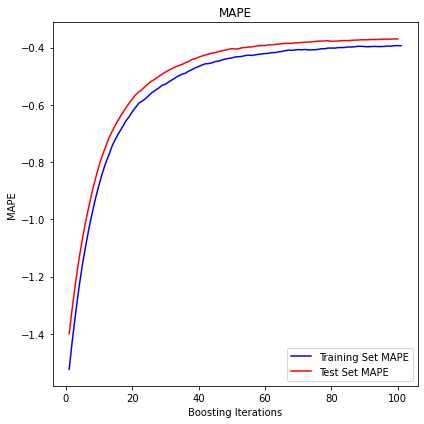

In [50]:
test_score =[]
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score.append(-mean_absolute_percentage_error(y_test, y_pred))
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MAPE")
plt.plot(
    np.arange(101) + 1,
    reg.train_score_,
    "b-",
    label="Training Set MAPE",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set MAPE"
)
plt.legend(loc="lower right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MAPE")
fig.tight_layout()
plt.show()


In [51]:
mae = make_scorer(mean_absolute_error, greater_is_better=False)

In [52]:
reg=HistGradientBoostingRegressor(verbose=3,random_state=42, categorical_features=cat_feat_mask,scoring=mae)

In [53]:
reg.fit(X_train,y_train)

Binning 0.011 GB of training data: 0.122 s
Binning 0.001 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 8, train score: -555411.86650, val score: -546427.36122, in 0.029s
[2/100] 1 tree, 31 leaves, max depth = 8, train score: -516719.69902, val score: -510576.03619, in 0.037s
[3/100] 1 tree, 31 leaves, max depth = 7, train score: -482827.55826, val score: -477193.30248, in 0.037s
[4/100] 1 tree, 31 leaves, max depth = 8, train score: -454041.73545, val score: -450879.05690, in 0.031s
[5/100] 1 tree, 31 leaves, max depth = 9, train score: -429407.65877, val score: -426325.93099, in 0.041s
[6/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 7, train score: -408490.40333, val score: -406815.09734, in 0.043s
[7/100] 1 tree, 31 leaves, max depth = 8, train score: -390153.71923, val score: -388103.97395, in 0.041s
[8/100] 1 tree, 31 leaves, max depth = 8, train score: -373285.38559, val score: -372975.65378, in 0.041s
[9/100] 1 tree, 31 leaves, max depth = 9, train score: -360124.75512, val score: -360499.63665, in 0.043s
[10/100] 1 tree, 31 leaves, max depth = 8, train score: -348401.41787, val score: -349221.18932, in 0.043s
[11/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 9, train score: -338143.74752, val score: -340380.51852, in 0.047s
[12/100] 1 tree, 31 leaves, max depth = 8, train score: -329406.37015, val score: -333179.35563, in 0.047s
[13/100] 1 tree, 31 leaves, max depth = 11, train score: -320738.73592, val score: -325638.37326, in 0.049s
[14/100] 1 tree, 31 leaves, max depth = 10, train score: -313410.57756, val score: -319192.74773, in 0.050s
[15/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -307251.57999, val score: -314934.52911, in 0.051s
[16/100] 1 tree, 31 leaves, max depth = 10, train score: -302133.17862, val score: -311246.78011, in 0.050s
[17/100] 1 tree, 31 leaves, max depth = 11, train score: -296991.12960, val score: -307005.80372, in 0.053s
[18/100] 1 tree, 31 leaves, max depth = 9, train score: -291237.03128, val score: -302654.24169, in 0.057s
[19/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 9, train score: -286176.66527, val score: -299526.14679, in 0.055s
[20/100] 1 tree, 31 leaves, max depth = 11, train score: -282111.43191, val score: -296351.07777, in 0.063s
[21/100] 1 tree, 31 leaves, max depth = 11, train score: -278941.17548, val score: -294373.11775, in 0.064s
[22/100] 1 tree, 31 leaves, max depth = 10, train score: -275873.47562, val score: -291807.76826, in 0.067s
[23/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -273662.78619, val score: -290256.70056, in 0.083s
[24/100] 1 tree, 31 leaves, max depth = 14, train score: -270793.76531, val score: -287792.72261, in 0.052s
[25/100] 1 tree, 31 leaves, max depth = 12, train score: -267767.50023, val score: -285017.58147, in 0.052s
[26/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -265162.48822, val score: -283091.07882, in 0.054s
[27/100] 1 tree, 31 leaves, max depth = 12, train score: -263586.58605, val score: -281832.42913, in 0.058s
[28/100] 1 tree, 31 leaves, max depth = 8, train score: -261146.98715, val score: -280531.38078, in 0.052s
[29/100] 1 tree, 31 leaves, max depth = 10, train score: -259184.53240, val score: -279691.34044, in 0.054s
[30/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -256841.87539, val score: -277767.45258, in 0.063s
[31/100] 1 tree, 31 leaves, max depth = 9, train score: -255213.72956, val score: -277061.97299, in 0.063s
[32/100] 1 tree, 31 leaves, max depth = 10, train score: -253515.64389, val score: -275731.07513, in 0.054s
[33/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 10, train score: -252098.14377, val score: -274551.52791, in 0.068s
[34/100] 1 tree, 31 leaves, max depth = 13, train score: -250786.48464, val score: -273517.08181, in 0.073s
[35/100] 1 tree, 31 leaves, max depth = 10, train score: -249240.88714, val score: -272634.35380, in 0.063s
[36/100] 1 tree, 31 leaves, max depth = 10, train score: -247261.09142, val score: -271930.12741, in 0.067s
[37/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -245292.41702, val score: -271033.59519, in 0.071s
[38/100] 1 tree, 31 leaves, max depth = 12, train score: -243508.29798, val score: -270057.32425, in 0.066s
[39/100] 1 tree, 31 leaves, max depth = 16, train score: -241980.59286, val score: -269198.16417, in 0.065s
[40/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -240488.06498, val score: -268883.48388, in 0.105s
[41/100] 1 tree, 31 leaves, max depth = 10, train score: -239513.35496, val score: -267805.57530, in 0.073s
[42/100] 1 tree, 31 leaves, max depth = 10, train score: -238336.90132, val score: -267141.71146, in 0.063s
[43/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -237073.39874, val score: -266803.55549, in 0.070s
[44/100] 1 tree, 31 leaves, max depth = 11, train score: -235965.44392, val score: -266097.25712, in 0.068s
[45/100] 1 tree, 31 leaves, max depth = 13, train score: -235252.77605, val score: -264676.36498, in 0.068s
[46/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -234769.26393, val score: -263970.08285, in 0.072s
[47/100] 1 tree, 31 leaves, max depth = 12, train score: -234064.49050, val score: -264033.59183, in 0.069s
[48/100] 1 tree, 31 leaves, max depth = 12, train score: -233092.86131, val score: -264070.65900, in 0.068s
[49/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -232001.37845, val score: -263428.10127, in 0.088s
[50/100] 1 tree, 31 leaves, max depth = 14, train score: -231146.16421, val score: -262611.22112, in 0.077s
[51/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -230968.71039, val score: -262614.52057, in 0.076s
[52/100] 1 tree, 31 leaves, max depth = 16, train score: -230675.78367, val score: -262826.91476, in 0.081s
[53/100] 1 tree, 31 leaves, max depth = 11, train score: -229871.64179, val score: -261892.50286, in 0.079s
[54/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 15, train score: -229560.76726, val score: -261583.97293, in 0.077s
[55/100] 1 tree, 31 leaves, max depth = 10, train score: -228801.71564, val score: -261140.01161, in 0.081s
[56/100] 1 tree, 31 leaves, max depth = 12, train score: -228265.23246, val score: -260520.59763, in 0.076s
[57/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -227445.50103, val score: -259190.18355, in 0.089s
[58/100] 1 tree, 31 leaves, max depth = 12, train score: -226853.03257, val score: -258650.05779, in 0.080s
[59/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -226410.04342, val score: -258509.27848, in 0.094s
[60/100] 1 tree, 31 leaves, max depth = 12, train score: -226013.44878, val score: -258500.73869, in 0.078s
[61/100] 1 tree, 31 leaves, max depth = 14, train score: -225579.66064, val score: -257205.87570, in 0.080s
[62/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -225087.07574, val score: -256882.01500, in 0.090s
[63/100] 1 tree, 31 leaves, max depth = 12, train score: -224852.70788, val score: -256978.06600, in 0.088s
[64/100] 1 tree, 31 leaves, max depth = 11, train score: -224438.98809, val score: -256560.04049, in 0.080s
[65/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -224079.11086, val score: -256357.33722, in 0.091s
[66/100] 1 tree, 31 leaves, max depth = 13, train score: -223423.54972, val score: -255999.27886, in 0.089s
[67/100] 1 tree, 31 leaves, max depth = 13, train score: -222805.15712, val score: -255932.87878, in 0.081s
[68/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -222227.48085, val score: -255201.67193, in 0.096s
[69/100] 1 tree, 31 leaves, max depth = 16, train score: -221707.76306, val score: -254682.67120, in 0.086s
[70/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 11, train score: -221493.22742, val score: -254746.37830, in 0.091s
[71/100] 1 tree, 31 leaves, max depth = 15, train score: -220943.56652, val score: -254481.25020, in 0.109s
[72/100] 1 tree, 31 leaves, max depth = 10, train score: -220310.06362, val score: -254056.91433, in 0.088s
[73/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 12, train score: -219693.37508, val score: -253799.14800, in 0.105s
[74/100] 1 tree, 31 leaves, max depth = 10, train score: -219557.01138, val score: -252826.52031, in 0.089s
[75/100] 1 tree, 31 leaves, max depth = 12, train score: -219191.37754, val score: -252663.83909, in 0.090s
[76/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 13, train score: -218800.52474, val score: -252577.58899, in 0.109s
[77/100] 1 tree, 31 leaves, max depth = 12, train score: -218293.61508, val score: -252432.41705, in 0.090s
[78/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 15, train score: -217991.07901, val score: -252301.57016, in 0.106s
[79/100] 1 tree, 31 leaves, max depth = 12, train score: -217618.14817, val score: -251902.29274, in 0.105s
[80/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 11, train score: -217294.40679, val score: -251804.45219, in 0.107s
[81/100] 1 tree, 31 leaves, max depth = 10, train score: -217141.83609, val score: -251510.96088, in 0.093s
[82/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 14, train score: -216822.65137, val score: -251084.56923, in 0.108s
[83/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -216093.06639, val score: -251542.49485, in 0.105s
[84/100] 1 tree, 31 leaves, max depth = 13, train score: -215840.97791, val score: -251390.00618, in 0.107s
[85/100] 1 tree, 31 leaves, max depth = 12, train score: -215543.54668, val score: -251128.44293, in 0.098s
[86/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -215072.53259, val score: -251164.84758, in 0.113s
[87/100] 1 tree, 31 leaves, max depth = 12, train score: -214749.29830, val score: -250646.41139, in 0.097s
[88/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 12, train score: -214435.19140, val score: -250326.86659, in 0.113s
[89/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 12, train score: -214006.69527, val score: -249913.92855, in 0.128s
[90/100] 1 tree, 31 leaves, max depth = 13, train score: -213664.72576, val score: -249531.53189, in 0.179s
[91/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 13, train score: -213366.32505, val score: -249476.50794, in 0.142s
[92/100] 1 tree, 31 leaves, max depth = 10, train score: -213318.23627, val score: -248879.64626, in 0.103s
[93/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names,

1 tree, 31 leaves, max depth = 17, train score: -213218.39544, val score: -248725.96919, in 0.118s
[94/100] 1 tree, 31 leaves, max depth = 11, train score: -212816.60196, val score: -248486.78314, in 0.105s
[95/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 15, train score: -212409.30070, val score: -248399.56651, in 0.103s
[96/100] 1 tree, 31 leaves, max depth = 13, train score: -212145.38715, val score: -248472.28887, in 0.116s
[97/100] 1 tree, 31 leaves, max depth = 14, train score: -211981.31826, val score: -248543.50457, in 0.102s
[98/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 11, train score: -211674.25548, val score: -248345.10403, in 0.131s
[99/100] 

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


1 tree, 31 leaves, max depth = 14, train score: -211301.58156, val score: -248169.07086, in 0.122s
[100/100] 1 tree, 31 leaves, max depth = 11, train score: -211168.40626, val score: -248102.66068, in 0.112s
Fit 100 trees in 8.144 s, (3100 total leaves)
Time spent computing histograms: 0.642s
Time spent finding best splits:  0.262s
Time spent applying splits:      0.475s
Time spent predicting:           0.026s


C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


HistGradientBoostingRegressor(categorical_features=[True, True, True, True,
                                                    True, True, True, True,
                                                    True, True, True, True,
                                                    False, False, False, False,
                                                    False, False, False, False,
                                                    False, False, False, False,
                                                    False, False],
                              random_state=42,
                              scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                              verbose=3)

In [54]:
mean_absolute_error(y_test, reg.predict(X_test))
mean_absolute_percentage_error(y_test, reg.predict(X_test))

0.3697016089568272

In [55]:
mean_absolute_error(y_test, reg.predict(X_test))


263473.643443036

In [56]:
reg.train_score_

array([-600884.95560984, -555411.86649999, -516719.69901827,
       -482827.55825695, -454041.73545299, -429407.65876522,
       -408490.40332561, -390153.71923126, -373285.38559236,
       -360124.75512457, -348401.41787234, -338143.7475215 ,
       -329406.37015218, -320738.7359201 , -313410.57755603,
       -307251.57998813, -302133.17861906, -296991.12960392,
       -291237.03127892, -286176.66527291, -282111.4319061 ,
       -278941.17547825, -275873.47561584, -273662.78618911,
       -270793.76530723, -267767.50023158, -265162.48822287,
       -263586.58604503, -261146.98714725, -259184.53240135,
       -256841.87539304, -255213.72956373, -253515.64389174,
       -252098.14376744, -250786.48464286, -249240.88714138,
       -247261.09142308, -245292.41702191, -243508.29798304,
       -241980.59285816, -240488.06498199, -239513.35496491,
       -238336.90132411, -237073.39873664, -235965.44391546,
       -235252.77605222, -234769.26393297, -234064.49050327,
       -233092.86130728,

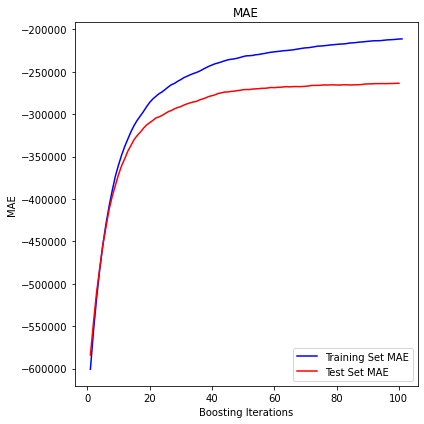

In [57]:
test_score =[]
for i,y_pred in enumerate(reg.staged_predict(X_test)):
    test_score.append(-mean_absolute_error(y_test, y_pred))
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MAE")
plt.plot(
    np.arange(101) + 1,
    reg.train_score_,
    "b-",
    label="Training Set MAE",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set MAE"
)
plt.legend(loc="lower right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MAE")
fig.tight_layout()
plt.show()

## GradientBoostingRegressor 

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [59]:
RANDOM_SEED = 42

In [ ]:
#reg=HistGradientBoostingRegressor(verbose=3,random_state=42, categorical_features=cat_feat_mask,scoring=mape)

In [74]:
model = GradientBoostingRegressor(max_depth=15, min_samples_leaf= 15, min_samples_split= 10, max_features= 'auto', random_state=RANDOM_SEED)

In [75]:
model.fit(X_train, np.log(y_train))

GradientBoostingRegressor(max_depth=15, max_features='auto',
                          min_samples_leaf=15, min_samples_split=10,
                          random_state=42)

In [76]:
y_pred = model.predict(X_test)

In [77]:
mean_absolute_percentage_error(y_test, np.exp(y_pred))

0.2426046465253648

In [78]:
mean_absolute_error(y_test, np.exp(y_pred))

206917.21741424745

In [79]:
[i for i in model.staged_predict(X_test)]

[array([12.95555158, 12.87108593, 12.94942502, ..., 13.00483909,
        12.85122484, 12.98745415]),
 array([12.94731959, 12.80708127, 12.89167383, ..., 13.03319368,
        12.70064599, 13.01577401]),
 array([12.95701888, 12.75039592, 12.88065044, ..., 13.10619122,
        12.59725158, 13.00538917]),
 array([12.95367348, 12.69789756, 12.84092794, ..., 13.17664132,
        12.51690437, 13.02354066]),
 array([12.94312083, 12.62804095, 12.79297058, ..., 13.20080039,
        12.45484719, 13.03232488]),
 array([12.9410902 , 12.57873778, 12.76520163, ..., 13.25644534,
        12.39112737, 13.01968262]),
 array([12.94440967, 12.53508988, 12.72551101, ..., 13.27357492,
        12.32666058, 13.00272676]),
 array([12.94612664, 12.50799658, 12.68626931, ..., 13.2887892 ,
        12.28039129, 12.99725913]),
 array([12.97458019, 12.47928222, 12.66017443, ..., 13.31929601,
        12.2109543 , 12.97750073]),
 array([12.96081838, 12.47537451, 12.63543923, ..., 13.33260247,
        12.15193085, 13.00

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

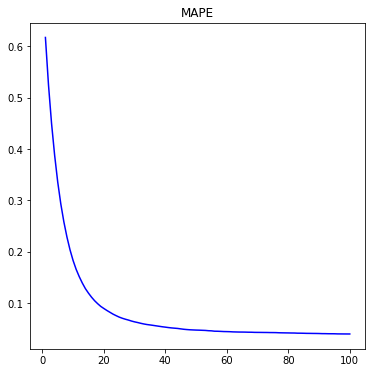

In [80]:
test_scoreGB =[]
for i,y_pred in enumerate(model.staged_predict(X_test)):
    test_score.append(-mean_absolute_percentage_error(y_test, y_pred))
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MAPE")
plt.plot(
    np.arange(100) + 1,
    model.train_score_,
    "b-",
    label="TrainingGB Set MAPE",
)
plt.plot(
    np.arange(100) + 1, test_scoreGB, "r-", label="TestGB Set MAPE"
)
plt.legend(loc="lower right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MAPE")
fig.tight_layout()
plt.show()

In [81]:
mae = make_scorer(mean_absolute_error, greater_is_better=False)

In [82]:
#model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=15, max_features='auto',
                          min_samples_leaf=15, min_samples_split=10,
                          random_state=42)

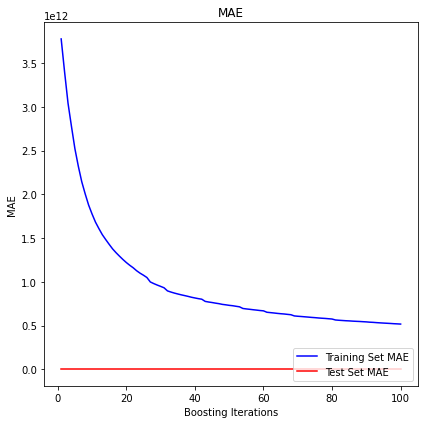

In [84]:
test_score =[]
for i,y_pred in enumerate(model.staged_predict(X_test)):
    test_score.append(-mean_absolute_error(y_test, y_pred))
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("MAE")
plt.plot(
    np.arange(100) + 1,
    model.train_score_,
    "b-",
    label="Training Set MAE",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set MAE"
)
plt.legend(loc="lower right")
plt.xlabel("Boosting Iterations")
plt.ylabel("MAE")
fig.tight_layout()
plt.show()

## RandomForestRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [42]:
m1 = RandomForestRegressor(n_estimators=500,n_jobs=-1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),df.target, test_size=0.2, random_state=42)

In [44]:
m1.fit(X_train,y_train)

mean_absolute_percentage_error(y_test,m1.predict(X_test))

0.31436215218907587

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),np.log(df.target), test_size=0.2, random_state=4)

In [46]:
m1.fit(X_train,y_train)

mean_absolute_percentage_error(np.exp(y_test),np.exp(m1.predict(X_test)))

0.2508491220970764

In [47]:
mean_absolute_error(np.exp(y_test),np.exp(m1.predict(X_test)))

219747.79057167866

In [85]:
ind = np.random.randint(0, 10000, size = 50)

In [89]:
explainer = shap.KernelExplainer(reg.predict, X_test.iloc[ind,])

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names


In [90]:
sh_val= explainer.shap_values(X_test.iloc[ind,])

  0%|          | 0/50 [00:00<?, ?it/s]

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and dep

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and dep

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and dep

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and dep

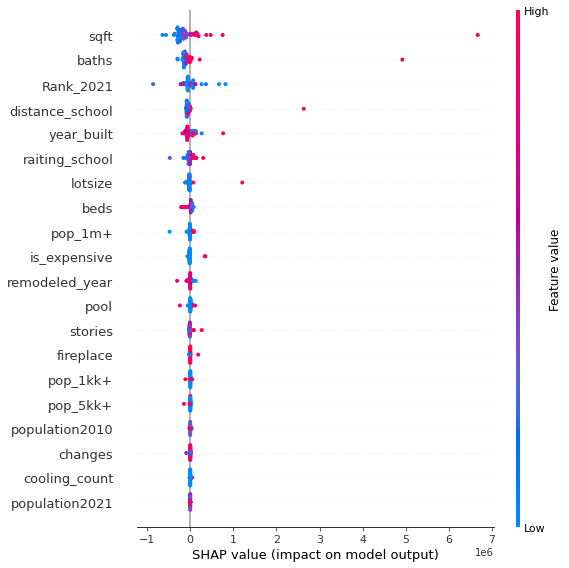

In [91]:
shap.summary_plot(sh_val, X_test.iloc[ind,])

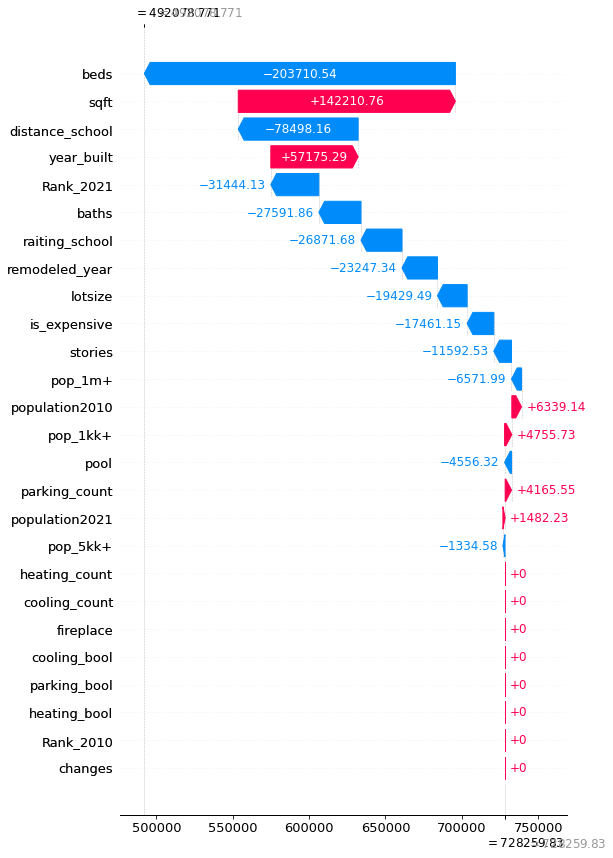

In [96]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, sh_val[8], max_display = 100, feature_names = features)

In [94]:
X_test.iloc[ind[0],]

fireplace          0.000000e+00
stories            1.000000e+00
pool               1.000000e+00
heating_bool       1.000000e+00
parking_bool       1.000000e+00
cooling_bool       1.000000e+00
is_expensive       0.000000e+00
pop_1m+            0.000000e+00
pop_5kk+           0.000000e+00
pop_1kk+           0.000000e+00
Rank_2021          3.000000e+00
Rank_2010          4.000000e+00
baths              2.000000e+00
sqft               1.670000e+03
beds               3.000000e+00
raiting_school     4.333333e+00
distance_school    3.883333e+00
year_built         2.003000e+03
remodeled_year     2.006000e+03
lotsize            6.098000e+03
heating_count      1.000000e+00
cooling_count      1.000000e+00
parking_count      1.000000e+00
population2010     1.880131e+07
population2021     2.178113e+07
changes            1.585000e+01
Name: 90001, dtype: float64